In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
#
# XOR example
#
# 0,0 => 0
# 0,1 => 1
# 1,0 => 1
# 1,1 => 0

XOR_X = np.array([[0,0],[0,1],[1,0],[1,1]])
XOR_Y = np.array([[0],  [1],  [1],  [0]])

In [3]:
#
# Build model graph
#
n_input_features = 2
n_hidden_nodes = 2
n_output_features = 1

# tensors to represent our model:
#   input: Nx2
#   weights: 2x1
#   bias: 2x1
#   output = w * x + b
x = tf.placeholder(tf.float32, shape=(None,n_input_features), name='input')
y = tf.placeholder(tf.float32, shape=(None,n_output_features), name='correct_output')

w_hidden = tf.Variable(tf.random_uniform([n_input_features,n_hidden_nodes]), name="weights_hidden")
b_hidden = tf.Variable(tf.random_uniform([n_hidden_nodes]), name="bias_hidden")

w = tf.Variable(tf.random_uniform([n_hidden_nodes,n_output_features]), name="weights")
b = tf.Variable(tf.random_uniform([n_output_features]), name="bias")

layer1 = tf.sigmoid(tf.add(tf.matmul(x,w_hidden), b_hidden))
output = tf.sigmoid(tf.add(tf.matmul(layer1, w), b))

[[0.06799753]
 [0.93536365]
 [0.935514  ]
 [0.07101597]]


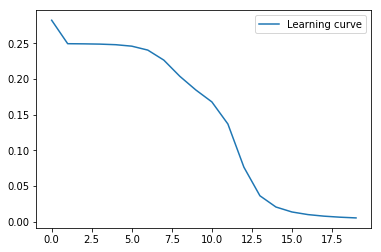

In [6]:
#
# Train model
#

# Inefficient, but simplest cost function
cost = tf.reduce_mean(tf.square(y - output)) 

# Gradient descent with learning rate=0.5
optimizer = tf.train.GradientDescentOptimizer(1).minimize(cost)

# Run training
sess = tf.Session()
sess.run(tf.global_variables_initializer())
cost_history = []
for epoch in range(2000):
    sess.run(optimizer, feed_dict={x: XOR_X, y: XOR_Y})
    if epoch % 100 == 0:
        cost_history.append( sess.run(cost, {x: XOR_X, y: XOR_Y}) )

# Evaluate model
out = sess.run(output, feed_dict={x: XOR_X, y: XOR_Y})
print(out)

# Learning curve
plt.plot(cost_history, label='Learning curve')
plt.legend()
plt.show()